<a href="https://colab.research.google.com/github/hinsley/colabs/blob/master/Least_Squares_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For a linear regression function $y(x) = mx + b$ fitting a set $P$ of points $(x, y)$ in $\mathbb{R}^2$, $m = \frac{|P| \sum(xy) - \sum(x) \sum(y)}{|P| \sum(x^2) - (\sum(x))^2}$ and $b = \frac{\sum(y) - m \sum(x)}{|P|}$.

In [0]:
from typing import Callable, List, Tuple

def line_fit(points: List[Tuple[float, float]]) -> Callable[[float], float]:
  len_points = len(points)
  sum_xy = 0
  sum_x = 0
  sum_y = 0
  sum_x_squared = 0

  for (x, y) in points:
    sum_xy += x * y
    sum_x += x
    sum_y += y
    sum_x_squared += x * x
  
  slope = (len_points * sum_xy - sum_x * sum_y)/(len_points * sum_x_squared - sum_x * sum_x)
  offset = (sum_y - slope * sum_x)/len_points

  def y(x: float) -> float:
    return x * slope + offset

  return y

In [0]:
from random import randint

points = [(randint(-i, i), randint(-i, i)) for i in range(100)]

y_1 = line_fit(points)

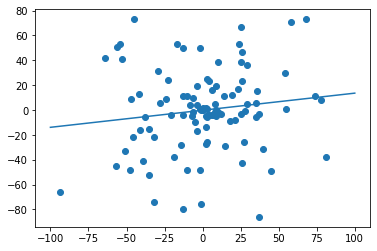

In [0]:
from matplotlib import pyplot as plt
import numpy as np

plt.scatter(*np.transpose(points))
plt.plot([-100, 100], [y_1(-100), y_1(100)])
plt.show()